# Loan Defaulters

For this project we will be exploring the publicly available data from LendingClub.com. 
Lending Club connects people who need money (borrowers) with people who have money (investors). As an investor one would want to invest in people who showed a profile of having a high probability of paying the amount back 

The data that we have is from 2007-2010.

## Problem Statement

Using Decision Tree model, classify whether or not the borrower paid back their loan in full. 


## About the Dataset

The snapshot of the data you will be working on:

![dtdataset](images/dt_dataset.PNG)


|Feature|Description|
|-----|-----|
|customer.id|ID of the customer|
|credit.policy|If the customer meets the credit underwriting criteria of LendingClub.com or not|
|purpose|The purpose of the loan(takes values :"credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").|
|int.rate|The interest rate of the loan|
|installment|The monthly installments owed by the borrower if the loan is funded|
|log.annual.inc|The natural log of the self-reported annual income of the borrower|
|dti|The debt-to-income ratio of the borrower (amount of debt divided by annual income)|
|fico|The FICO credit score of the borrower|
|days.with.cr.line|The number of days the borrower has had a credit line.|
|revol.bal|The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)|
|revol.util|The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)|
|pub.rec| The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)
|inq.last.6mths| The borrower's number of inquiries by creditors in the last 6 months|
|delinq.2yrs| The number of times the borrower had been 30+ days past due on a payment in the past 2 years|
|paid.back.loan|Whether the user has paid back loan|


## Why solve this project ?

After completing this project, you will have a better understanding of how to build a decision tree model. In this project, you will apply the following concepts.

 
- Train-test split
- Correlation between the features 
- Decision Tree Modeling
- Evaluation Metrics
- Graphviz plotting


## Data loading

The first task is 'surprise' loading the data and see how it looks. Also drop certain columns and split the data for further tasks.

* Load the dataset from `'path'`(given) and store it in a variable called `'data'`.


* Create a subset of dataframe `'data'` by dropping the columns `['customer.id','paid.back.loan']` and save the subset in a variable called `'X'`.


* Store the target variable (`'paid.back.loan'`) in a variable called `y`


* Split `'X'`and `'y'` into `X_train,X_test,y_train,y_test` using `train_test_split()` function. Use `test_size = 0.3` and `random_state = 0 `



# Hints

Use `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)` to split the data.


# Test cases 

#data

Variable declaration check

data.shape==(9578,15)

data.iloc[2,6]==11.63

type(data)==pandas.core.frame.DataFrame

#X_train

Variable declaration check

type(X)==pandas.core.frame.DataFrame

X.shape==(9578, 13)

#y

Variable declaration check

type(y)==pandas.core.series.Series

len(y)==9578

#X_train

Variable declaration check

type(X_train)==pandas.core.frame.DataFrame

X_train.iloc[1,5]==3.52


#X_test

Variable declaration check

type(X_test)==pandas.core.frame.DataFrame

X_test.iloc[1,5]==10.0


#y_train

Variable declaration check

type(y_train)==pandas.core.series.Series

y_train[100]=='Yes'

#y_test

Variable declaration check

type(y_test)==pandas.core.series.Series

y_test[50]=='Yes'

In [1]:
#Importing header files

import pandas as pd

import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split


#File path
path='data/cleaned_loan_data.csv'

#Code starts here

#Loading of data
data=pd.read_csv(path)


#Dropping ID and Target
X=data.drop(['customer.id','paid.back.loan'],1)

#Copying the target
y=data['paid.back.loan'].copy()


#Splitting the data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#Code ends here

# Success Message

Congrats! You have successfully loaded the data and split the data into train and test

# Target variable distribution

Now let's look at the distribution of `'paid.back.loan'`


* Save the value counts of `paid.back.loan` in a variable called `'loan_paid_back'` using `"value_counts()"`.


* Plot a bar graph of `'loan_paid_back'`.


## Things to ponder upon:

# Hints

The x-axis parameter of the `bar()` function would be `fully_paid.index`


# Test Cases

#fully_paid

Variable declaration check

fully_paid[0]==5639

fully_paid[1]==1065


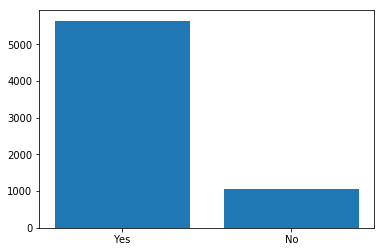

In [2]:
#Importing header files
import matplotlib.pyplot as plt
%matplotlib inline


#Code starts here

#Storing value counts of target variable in 'fully_paid'
fully_paid=y_train.value_counts()

#Plotting bar plot
plt.bar(fully_paid.index, fully_paid)
plt.show()

#Code ends here

# Success Message

Congrats! You have successfully plotted barplot for target variable.

# Feature Split

In this task along with one step of feature engineering, we will split the features based on the data type for visualization purposes.

* From the column `int.rate` of `'X_train'`, remove the `%` character and convert the column into float.


* After that divide the values of `int.rate` with 100 and store the result back to the column `'int.rate'`


* Do the same with the `int.rate` of `'X_test'`


* Create a subset of only numerical columns of `'X_train'` using `"select_dtypes()"` and save it to a variable called `'num_df'`


* Create a subset of only categorical(object) columns of `'X_train'` using `"select_dtypes()"` and save it to a variable called `'cat_df'`




# Hints

You can drop `%` from `int.rate` from `'X_train'` by writing code similar to:

`X_train['int.rate'].map(lambda x: str(x)[:-1])`


You can divide `int.rate` by 100 by writing code similar to:

`X_train['int.rate'].astype(float)/100`



# Test Case

#X_train['int.rate']

np.round(X_train['int.rate'][100],4)==np.round(0.0712,4)

np.round(X_test['int.rate'][50],2)==np.round(0.0742,4)


np.all(num_df.columns.values==['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec'])

np.all(cat_df.columns.values==['credit.policy' ,'purpose' ,'inq.last.6mths', 'delinq.2yrs'])

In [3]:
#Importing header files
import numpy as np
from sklearn.preprocessing import LabelEncoder


#Code starts here

#Removing the last character from the values in column
X_train['int.rate'] = X_train['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
X_train['int.rate']=X_train['int.rate'].astype(float)/100

#Removing the last character from the values in column
X_test['int.rate'] = X_test['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
X_test['int.rate']=X_test['int.rate'].astype(float)/100

#Storing all the numerical type columns in 'num_df'
num_df=X_train.select_dtypes(include=['number']).copy()

#Storing all the categorical type columns in 'cat_df'
cat_df=X_train.select_dtypes(include=['object']).copy()

#Code ends here

# Success Message

Congrats! You have modified `int.rate` column and split columns according to data type.

# Numerical Features Visualisation

Let's plot and see the relation of numerical features with the target variable.



* Create a list called `cols` which is a list of all the column names of `'num_df'`. 


* Create subplot with `(nrows = 4 , ncols = 1)` and store it in variable's `fig ,axes`


* Create `for` loop to iterate through rows.


* Inside the loop, using seaborn, plot the `boxplot` where `x=y_train`, `y=num_df_train[cols[i]]` and `ax=axes[i]`. 



# Hints
You can create `'cols'` by writing code similar to :

`"cols=list(num_df.columns)"`

You can create subplots by writing code similar to :

`"fig,axes=plt.subplots(4,1, figsize=(10,20))"`

# Test Cases

(sorted(cols)==sorted(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec'])





<Figure size 1440x1440 with 0 Axes>

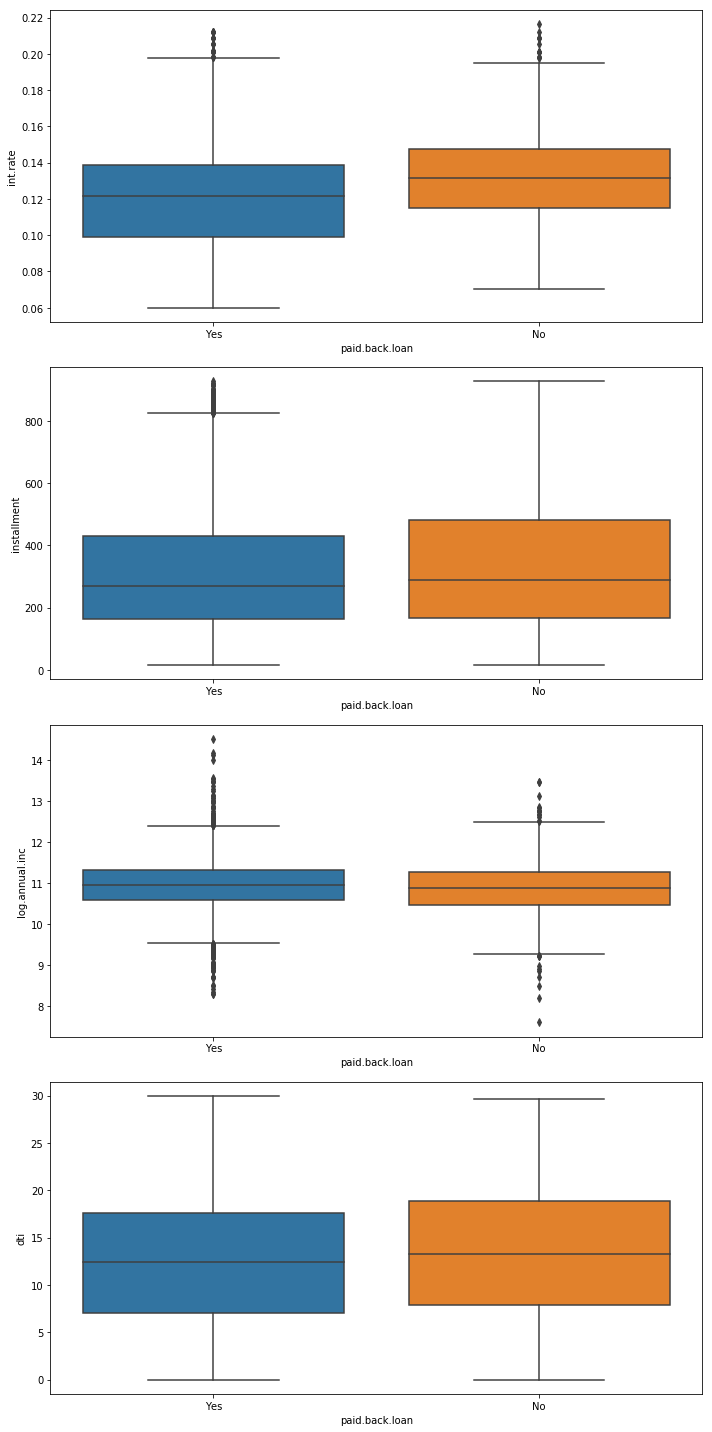

In [4]:
#Importing header files
import seaborn as sns
%matplotlib inline

#Code starts here

#Setting the figure size
plt.figure(figsize=(20,20))


#Storing the columns of 'num_df'
cols=list(num_df.columns)


#Creating subplots
fig,axes=plt.subplots(4,1, figsize=(10,20))


#Looping across rows
for i in range(0,4):          
    
    #Plotting boxplot
    sns.boxplot(x=y_train,y=num_df[cols[i]],ax=axes[i])
    
    #Avoiding subplots overlapping
    fig.tight_layout()    

    
#Code ends here

# Success Message

Congrats! You have successfully plotted boxplots comparing numerical features with the binary target variable.

# Categorical Features Visualisation

Let's plot and see the relation of categorical features with the target variable.


* Create a list called `cols` which is a list of all the column names of `'cat_df'`. 


* Create subplot with `(nrows = 2 , ncols = 2)` and store it in variable's `fig ,axes`


* Create two `for` loops to access rows and columns


* Using seaborn plot the `countplot` where `x=X_train[cols[i*2+j]]`, `hue=y_train` and `ax=axes[i,j]`

# Hints
Inside the i,j `for` loop, code should look similar to:

`"sns.countplot(x=X_train[cols[i*2+j]], hue=y_train,ax=axes[i,j])"`


# Test cases

sorted(cols)==sorted(['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs'])


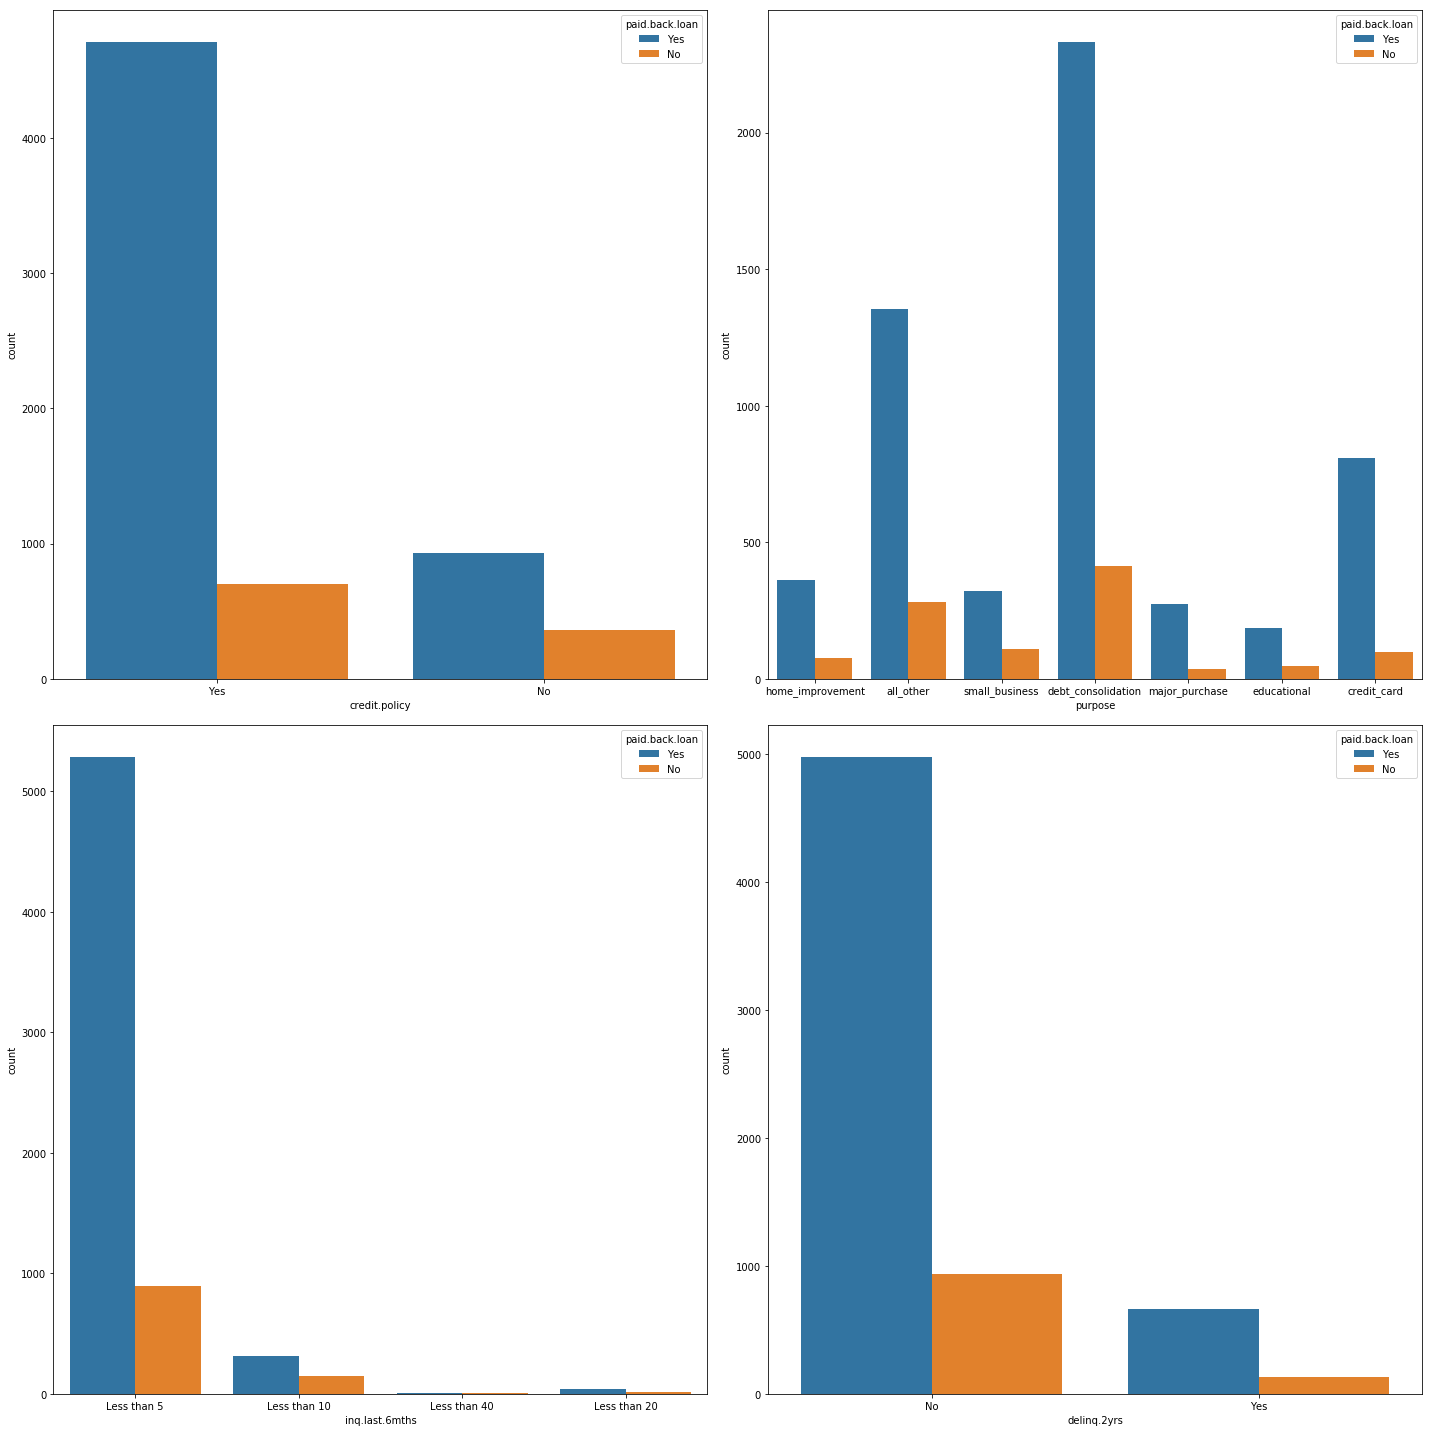

In [5]:
#Code starts here

#Storing the columns of 'cat_df'
cols=list(cat_df.columns)

#Setting up subplots
fig,axes=plt.subplots(2,2, figsize=(20,20))

#Looping through rows
for i in range(0,2):
    
    #Looping through columns
    for j in range(0,2):
        
        #Plotting count plot
        sns.countplot(x=X_train[cols[i*2+j]], hue=y_train,ax=axes[i,j])                        
        
        #Avoiding subplots overlapping
        fig.tight_layout()    

#Code ends here

# Success Message

Congrats! You have successfully plotted (bar plot) against target variable.

# Model Building

Let's finally get to the part of decision tree modeling. 

- Create a `LabelEncoder` object of `sklearn` and store it in a variable called `'le'`


- Use `le` to fit and transform all categorical columns of `'X_train'` and transform all categorical columns of `'X_test'`.


- Replace `No` with `0` and `Yes` with `1` in both `'y_train'` and `'y_test'`


- Create a `DecisionTreeClassifier` object of `sklearn` with `random_state=0` and save it in a variable called `'model'`.


- Fit `'X_train'` and `'y_train'` with `'model'`


- Find the accuracy score of `model` with `'X_test'` and `'y_test'` and store it in a variable called `acc` 

# Hints

With `'X_train'`, you need to use `"le.fit_transform()"`

With `'X_test'`, you need to use `"le.transform()"`


# Test Case

#credit.policy 

X_train[credit.policy][100]==1
X_test[credit.policy][50]==1

#purpose 

X_train[purpose][100]==2
X_test[purpose][50]==1

#inq.last.6mths
X_train[inq.last.6mths][100]==3
X_test[inq.last.6mths][50]==3


#delinq.2yrs 

X_train[delinq.2yrs][100]==3
X_test[delinq.2yrs][50]==3


#acc

Variable declaration check

np.round(acc,2)==np.round(0.73,2)

In [6]:
#Importing header files
from sklearn.tree import DecisionTreeClassifier

#Code starts here

#Looping through categorical columns
for col in cat_df.columns:
    
    #Filling null values with 'NA'
    X_train[col].fillna('NA',inplace=True)
    
    #Initalising a label encoder object
    le=LabelEncoder()
    
    #Fitting and transforming the column in X_train with 'le'
    X_train[col]=le.fit_transform(X_train[col]) 
    
    #Filling null values with 'NA'
    X_test[col].fillna('NA',inplace=True)
    
    #Fitting the column in X_test with 'le'
    X_test[col]=le.transform(X_test[col]) 

#Initialising 'Decision Tree' model    
model=DecisionTreeClassifier(random_state=0)

#Training the 'Decision Tree' model
model.fit(X_train, y_train)

#Finding the accuracy of 'Decision Tree' model
acc=model.score(X_test, y_test)

#Printing the accuracy
print(acc)

#Code ends here

0.7334725121781489


# Success Message

Congrats! You have successfully trained data with Decision Tree and found out its accuracy.

# Decision Tree Pruning

Let's see if pruning of decision tree improves its accuracy. We will use grid search to do the optimum pruning

- Parameter grid `param_grid` with the parameters to pass in Grid Search is given


- Create a `DecisionTreeClassifier` object of `sklearn` with `random_state=0` and save it in a variable called `'model_2'`.


- Create a `GridSearchCV` object from `sklearn` object with `estimator=model_2`, `param_grid=parameter_grid` and `cv=5`and save it in a variable called `'p_tree'`


- Fit `'X_train'` and `'y_train'` with `'p_tree'`


- Find the accuracy score of `p_tree` with `'X_test'` and `'y_test'` and store it in a variable called `acc_2` 


# Hints
Your Grid Search code should look similar to:

`"p_tree = GridSearchCV(model_2, parameter_grid, cv=5)"`


# Test Cases

#acc_2

Variable declaration check

np.round(acc_2,2)==np.round(0.83,2)

In [7]:
#Importing header files
from sklearn.model_selection import GridSearchCV

#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

#Code starts here

#Initialising 'Decision Tree' model
model_2 = DecisionTreeClassifier(random_state=0)

#Applying Grid Search of hyper-parameters and finding the optimum 'Decision Tree' model
p_tree = GridSearchCV(model_2, parameter_grid, cv=5)

#Training the optimum 'Decision Tree' model
p_tree.fit(X_train, y_train)

#Finding the accuracy of the optimum 'Decision Tree' model
acc_2 = p_tree.score(X_test, y_test)

#Printing the accuracy
print(acc_2)

#Code ends here

0.837160751565762


# Success Message

Congrats! You have successfully pruned the Decision Tree model using Grid Search and found out its accuracy 

# Tree visualising

Let's now see how the pruned decision tree looks like using graphviz.

- Create a `export_graphviz` object of `sklearn` with the hyper-parameters `decision_tree=p_tree.best_estimator_`, `out_file=None`, `feature_names=X.columns`, `filled = True` and  `class_names=['loan_paid_back_yes','loan_paid_back_no']` and save it in a variable called `'dot_data'`


- To draw the decision-tree(graph),  use `"pydotplus.graph_from_dot_data()"` and pass `'dot_data'` as its parameter and save the result in a variable called `'graph_big'`


- To see the image, use `"Image()"` and pass `'graph_big.create_png()'` as its parameter


# Hints

To create `dot data`, you can write code similar  to:

`dot_data = export_graphviz(decision_tree=p_tree.best_estimator_, out_file=None, 
                                feature_names=X.columns, filled = True,  
                                class_names=['loan_paid_back_yes','loan_paid_back_no'])`

To draw decision tree, you can write code similar to:

`graph_big = pydotplus.graph_from_dot_data(dot_data)`

To display graph, you can write code similar to:

`Image(graph_big.create_png())`




# Test Cases

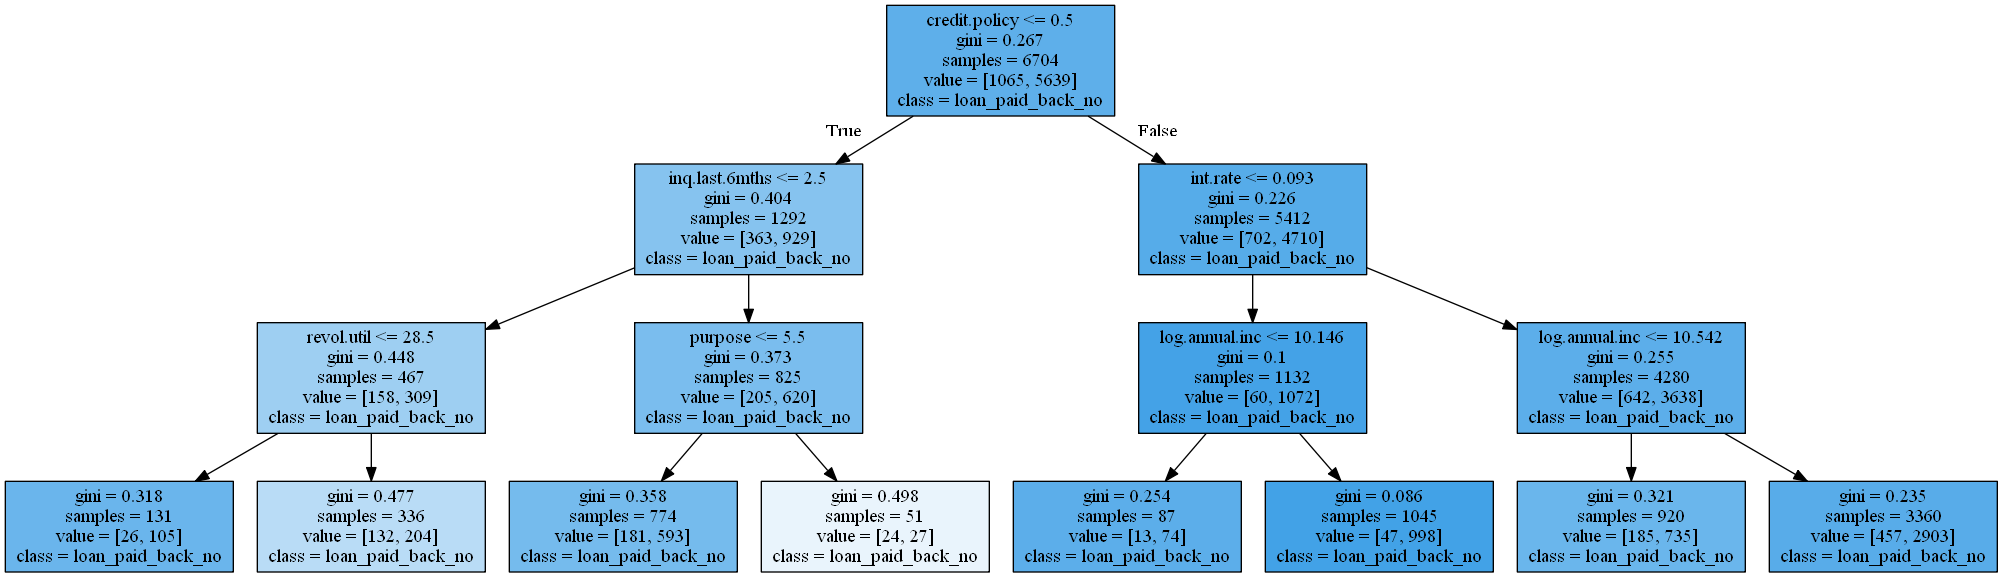

In [9]:
#Importing header files

from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus
%matplotlib inline

#Code starts here

#Creating DOT data
dot_data = export_graphviz(decision_tree=p_tree.best_estimator_, out_file=None, 
                                feature_names=X.columns, filled = True,  
                                class_names=['loan_paid_back_yes','loan_paid_back_no'])

#Drawing graph
graph_big = pydotplus.graph_from_dot_data(dot_data)  

#Saving graph
graph_big.write_png('images/DecisionTree.png')

#Displaying graph
Image(graph_big.create_png())

#Code ends here

# Success Message

Congrats! You have successfully drawn the pruned decision tree!